In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn              import svm
from scipy.signal import savgol_filter

In [2]:
Dict = {'Afghanistan': 'AFG', 'Albania': 'ALB', 'Algeria': 'DZA', 'American Samoa': 'ASM', 'Andorra': 'AND',
'Angola': 'AGO', 'Anguilla': 'AIA', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ABW',
'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB',
'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ', 'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN', 'Bolivia': 'BOL',
'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Brazil': 'BRA', 'British Indian Ocean Territory': 'IOT',
'British Virgin Islands': 'VGB', 'Brunei': 'BRN', 'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burundi': 'BDI',
'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN', 'Cape Verde': 'CPV', 'Cayman Islands': 'CYM', 'Central African Republic': 'CAF',
'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Christmas Island': 'CXR', 'Cocos (Keeling) Islands': 'CCK', 'Colombia': 'COL',
'Comoros': 'COM', 'Congo (Republic of the)': 'COG', 'Congo (Democratic Republic of the)': 'ZAR', 'Cook Islands': 'COK',
'Costa Rica': 'CRI', "Cote d'Ivoire": 'CIV', 'Croatia': 'HRV', 'Cuba': 'CUB', 'Cyprus': 'CYP', 'Czech Republic': 'CZE',
'Denmark': 'DNK', 'Djibouti': 'DJI', 'Dominica': 'DMA', 'Dominican Republic': 'DOM', 'Ecuador': 'ECU', 'Egypt': 'EGY',
'El Salvador': 'SLV', 'Equatorial Guinea': 'GNQ', 'Eritrea': 'ERI', 'Estonia': 'EST', 'Ethiopia': 'ETH', 'Falkland Islands (Islas Malvinas)': 'FLK',
'Faroe Islands': 'FRO', 'Fiji': 'FJI', 'Finland': 'FIN', 'France': 'FRA', 'French Guiana': 'GUF', 'French Polynesia': 'PYF',
'Gabon': 'GAB', 'West Bank and Gaza': 'PSE', 'Georgia': 'GEO', 'Germany': 'DEU', 'Ghana': 'GHA', 'Gibraltar': 'GIB', 'Greece': 'GRC',
'Greenland': 'GRL', 'Grenada': 'GRD', 'Guadeloupe': 'GLP', 'Guam': 'GUM', 'Guatemala': 'GTM', 'Guinea': 'GIN', 'Guinea-Bissau': 'GNB',
'Guyana': 'GUY', 'Haiti': 'HTI', 'Honduras': 'HND', 'Hungary': 'HUN', 'Iceland': 'ISL', 'India': 'IND', 'Indonesia': 'IDN',
'Iran': 'IRN', 'Iraq': 'IRQ', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA', 'Jamaica': 'JAM', 'Japan': 'JPN', 'Jordan': 'JOR',
'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Kiribati': 'KIR', 'Kosovo': 'XRK', 'Kuwait': 'KWT', 'Kyrgyz Republic': 'KGZ', 'Laos': 'LAO',
'Latvia': 'LVA', 'Lebanon': 'LBN', 'Lesotho': 'LSO', 'Liberia': 'LBR', 'Libya': 'LBY', 'Liechtenstein': 'LIE', 'Lithuania': 'LTU',
'Luxembourg': 'LUX', 'Macao SAR, China': 'MAC', 'Republic of North Macedonia': 'MKD', 'Madagascar': 'MDG', 'Malawi': 'MWI',
'Malaysia': 'MYS', 'Maldives': 'MDV', 'Mali': 'MLI', 'Malta': 'MLT', 'Marshall Islands': 'MHL', 'Martinique': 'MTQ',
'Mauritania': 'MRT', 'Mauritius': 'MUS', 'Mayotte': 'MYT', 'Mexico': 'MEX', 'Federated States of Micronesia': 'FSM',
'Moldova': 'MDA', 'Monaco': 'MCO', 'Mongolia': 'MNG', 'Republic of Montenegro': 'MNE', 'Montserrat': 'MSR', 'Morocco': 'MAR',
'Mozambique': 'MOZ', 'Myanmar (Burma)': 'MMR', 'Namibia': 'NAM', 'Nauru': 'NRU', 'Nepal': 'NPL', 'Netherlands': 'NLD',
'Netherlands Antilles': 'ANT', 'New Caledonia': 'NCL', 'New Zealand': 'NZL', 'Nicaragua': 'NIC', 'Niger': 'NER', 'Nigeria': 'NGA',
'Niue': 'NIU', 'Norfolk Island': 'NFK', "Korea, Democratic People's Republic of": 'PRK', 'Northern Mariana Islands': 'MNP',
'Norway': 'NOR', 'Oman': 'OMN', 'Pakistan': 'PAK', 'Palau': 'PLW', 'Panama': 'PAN', 'Papua New Guinea': 'PNG', 'Paraguay': 'PRY',
'Peru': 'PER', 'Philippines': 'PHL', 'Pitcairn Islands': 'PCN', 'Poland': 'POL', 'Portugal': 'PRT', 'Puerto Rico': 'PRI',
'Qatar': 'QAT', 'Reunion': 'REU', 'Romania': 'ROU', 'Russia': 'RUS', 'Rwanda': 'RWA', 'Samoa': 'WSM', 'San Marino': 'SMR',
'Sao Tome and Principe': 'STP', 'Saudi Arabia': 'SAU', 'Senegal': 'SEN', 'Republic of Serbia': 'SRB', 'Seychelles': 'SYC',
'Sierra Leone': 'SLE', 'Singapore': 'SGP', 'Slovakia': 'SVK', 'Slovenia': 'SVN', 'Solomon Islands': 'SLB', 'Somalia': 'SOM',
'South Africa': 'ZAF', 'Korea, Republic of': 'KOR', 'South Sudan': 'SSD', 'Spain': 'ESP', 'Sri Lanka': 'LKA', 'St. Helena': 'SHN',
'St. Kitts and Nevis': 'KNA', 'St. Lucia': 'LCA', 'St. Vincent and the Grenadines': 'VCT', 'Sudan': 'SDN', 'Suriname': 'SUR',
'Svalbard': 'SJM', 'Eswatini': 'SWZ', 'Sweden': 'SWE', 'Switzerland': 'CHE', 'Syria': 'SYR', 'Tajikistan': 'TJK',
'Tanzania,United Republic of': 'TZA', 'Thailand': 'THA', 'Bahamas, The': 'BHS', 'Gambia, The': 'GMB', 'Timor Leste': 'TLS',
'Togo': 'TGO', 'Tokelau': 'TKL', 'Tonga': 'TON', 'Trinidad and Tobago': 'TTO', 'Tunisia': 'TUN', 'Turkey': 'TUR',
'Turkmenistan': 'TKM', 'Turks and Caicos Islands': 'TCA', 'Tuvalu': 'TUV', 'Uganda': 'UGA', 'Ukraine': 'UKR',
'United Arab Emirates': 'ARE', 'United Kingdom': 'GBR', 'United States': 'USA', 'Uruguay': 'URY', 'Uzbekistan': 'UZB',
'Vanuatu': 'VUT', 'Venezuela': 'VEN', 'Vietnam': 'VNM', 'Virgin Islands': 'VIR', 'Wallis and Futuna': 'WLF',
'Western Sahara': 'ESH', 'Yemen': 'YEM', 'Zimbabwe': 'ZWE', 'Zambia': 'ZMB'}

In [3]:
def Analyse_Rain_Countries(Country = ['India','China'],Start_Year = 1901 , End_Year = 2020):

    """
    # Function Description : 
        This Function will Take One or more Countries Name and TimeFrame(Start_Year , End_Year).\n
        It Will return Pandas Dataframe of Average Annual Rainfall of Countries.
    # Function Parameters : 
            # Country : 
                    This Parameter will take List of Country Names. Full Name of Country is Required.\n
                    Default is ['India' , 'China']
            # Start_Year : 
                    Starting Year Parameter. \n
                    Default is 1901 , you can take any year in range [1901 , 2020]
            # End_Year : 
                    Ending Year Parameter. \n
                    Default is 2020, you can take any Year [Start_Year , 2020].
    """

    Flag = 0
    Frame = pd.DataFrame # Creating an object of pandas dataframe

    for country in Country:

        # Reading the Csv File
        File = pd.read_csv(r'dataset/Precipitation/pr_timeseries_annual_cru_1901-2020_' + str(Dict[country])  + '.csv',header= 1)
        
        #File.drop(labels = 'Variable:',axis = 0,inplace= True)
        #File = File.truncate(before = 1901 , after=2020)
        #File = File.drop(columns=File.index[0])
        File.rename(columns={'Unnamed: 0':'Year'},inplace=True)  # Setting unnamed column as Year
        
        File = File[(File['Year'] >= Start_Year) & (File['Year'] <= End_Year)]   # Taking data between given years
        File = File[['Year',country]]   # Dataframe for country along year
        File.reset_index(drop=True , inplace=True)

        if(Flag == 0):
            Frame = File
            Flag = 1
        else:
            Frame = Frame.merge(File)

    return Frame

In [4]:
Country = 'China'
Start_Year = 1900
End_Year = 2020
df = Analyse_Rain_Countries([Country], Start_Year, End_Year)
df

,Year,China
0,1901,561.73
1,1902,549.38
2,1903,616.98
3,1904,591.51
4,1905,609.91
...,...,...
115,2016,674.29
116,2017,634.22
117,2018,641.09
118,2019,614.16


In [5]:
X = df['Year'].values.reshape(-1, 1)
Y = df[Country]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
Data_list = [X_train, X_test, y_train, y_test]

In [7]:
Kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
def Model_Selection(Model,Data_list, name):
    Model.fit(Data_list[0],Data_list[2])
    y_Pred = Model.predict(Data_list[1])

    MAE = round(sm.mean_absolute_error(y_test, y_Pred), 2)
    MSE = round(sm.mean_squared_error(y_test, y_Pred), 2)
    MeAE = round(sm.median_absolute_error(y_test, y_Pred), 2)
    Variance = round(sm.explained_variance_score(y_test, y_Pred), 2)
    R2_Score =  round(sm.r2_score(y_test, y_Pred), 2)

    
    frame = pd.DataFrame({'Model': [name], 'MeanAbsoluteError': [MAE], 'MeanSquaredError': [MSE], 'MedianAbsoluteError': [MeAE], 'Variance': [abs(Variance)], 'R2_score':[abs(R2_Score)]})
    return frame

In [8]:
model1 = LinearRegression()
model2 = svm.SVR()
model3 = ElasticNet()
model4 = Lasso(alpha=0.1)
model5 = BayesianRidge()
Model_data = pd.concat([
                       Model_Selection(model1, Data_list, 'LinearRegression'),
                       Model_Selection(model2, Data_list, 'SupportVectorRegression'),
                       Model_Selection(model3, Data_list, 'ElasticNet'),
                       Model_Selection(model4, Data_list, 'Lasso'),
                       Model_Selection(model5, Data_list, 'BaysianRidge')],axis = 0).reset_index()
Model_data

,index,Model,MeanAbsoluteError,MeanSquaredError,MedianAbsoluteError,Variance,R2_score
0,0,LinearRegression,22.19,819.80,19.91,0.02,0.01
1,0,SupportVectorRegression,23.14,843.04,21.47,0.01,0.04
2,0,ElasticNet,22.19,819.79,19.92,0.02,0.01
3,0,Lasso,22.19,819.80,19.91,0.02,0.01
4,0,BaysianRidge,22.47,821.01,20.61,0.02,0.01


In [9]:
Model = svm.SVR()
Model.fit(Data_list[0],Data_list[2])
y_Pred = Model.predict([[2024], [2025], [2018]])
y_Pred

array([611.52314701, 611.50602244, 611.44773869])

In [10]:
df

,Year,China
0,1901,561.73
1,1902,549.38
2,1903,616.98
3,1904,591.51
4,1905,609.91
...,...,...
115,2016,674.29
116,2017,634.22
117,2018,641.09
118,2019,614.16


In [11]:
Year = []
prec = []
def Predict(year, Model):
    
    for i in range(2013, year + 1):
        print(i)
        print(Model.predict([[i]]))
        Year.append(i)
        #print(Model.predict([[i]]))
        prec.append(Model.predict([[i]])[0])
        df.loc[len(df)] = [i, Model.predict([[i]])[0]]

Predict(2030, Model)
print(Year)
print(prec)
        

2013
[611.14544138]
2014
[611.22292364]
2015
[611.29204769]
2016
[611.35263969]
2017
[611.40456696]
2018
[611.44773869]
2019
[611.48210647]
2020
[611.50766441]
2021
[611.52444893]
2022
[611.53253819]
2023
[611.53205127]
2024
[611.52314701]
2025
[611.50602244]
2026
[611.48091113]
2027
[611.44808107]
2028
[611.40783247]
2029
[611.36049521]
2030
[611.30642623]
[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
[611.1454413771678, 611.2229236404013, 611.292047685986, 611.3526396940966, 611.4045669583431, 611.4477386872754, 611.4821064716332, 611.5076644146985, 611.5244489264094, 611.532538185203, 611.5320512748675, 611.5231470069117, 611.5060224421086, 611.4809111278608, 611.4480810708492, 611.4078324670112, 611.3604952132239, 611.3064262270948]


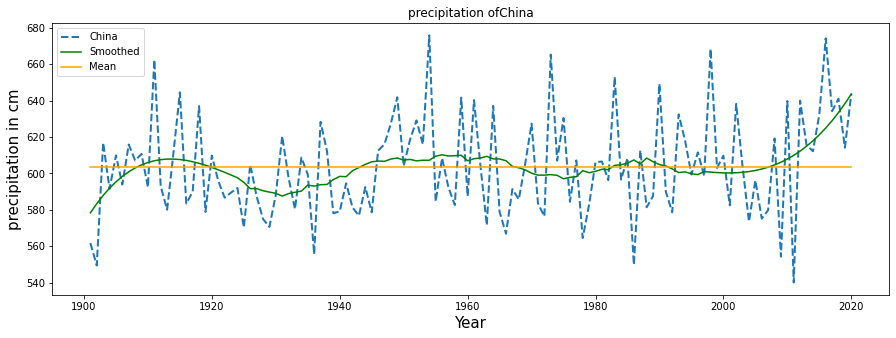

In [14]:
Arr = np.array([list(df['Year']), list(df[df.columns[1]])])
Smoothed = savgol_filter(Arr[1], window_length=47, polyorder=3, mode='interp')

Plot = df.plot(x='Year', linestyle='dashed', linewidth=2,
                          title='precipitation of  ' + Country, ylabel='Precipitaion in mm')

plt.rcParams['figure.figsize'] = [15, 5]
plt.xlabel('Year', fontsize=15)
plt.ylabel('precipitation in cm', fontsize=15)
plt.title('precipitation of' + df.columns[1])


#Plot = df.plot(x = 'Year', linestyle='dashed', linewidth=2, title='Temperature of ' + df.columns[1], ylabel='Temperature in degree celsius')
plt.plot(Arr[0], Smoothed, color='green', label='Smoothed')
y_mean = [np.mean(Arr[1])]*len(Arr[0])
plt.plot(Arr[0], y_mean, label='Mean', color='orange')
legend = plt.legend(loc='upper left')
plt.show()